# Поиска инсайтов и точек роста

Однако конкуренты сервиса «Всё.из.кафе» не дремлют, и руководство ждёт от продукта роста. 

Необходимо помочь бизнесу ответить на следующие вопросы:
- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи 

В рамках данного проекта мы проведем комплексный анализ данных:
- изучим пользовательский путь и проанализируем конверсии через воронки;
- сегментируем пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризуем рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

## 1. Загрузка данных и их предобработка

In [1]:
# Загружаем все необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
!pip install missingno -q
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Загружаем рабочий датафрейм
data = pd.read_csv('https://code.s3.yandex.net/datasets/insides_data.csv')

Перейдем к предобработке датафрейма. 

In [3]:
# Выведем первые пять строк датафрейма 
data.head()

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


In [5]:
data.isna().sum() / data.shape[0]

visitor_uuid    0.000000
user_id         0.000000
device_type     0.000000
city_id         0.000000
source          0.000000
first_date      0.000000
visit_id        0.000000
event           0.000000
datetime        0.000000
rest_id         0.187801
object_id       0.896316
order_id        0.965899
revenue         0.965899
delivery        0.965899
commission      0.896316
dtype: float64

In [6]:
#Посмотрим уникальные события 
data['event'].unique()

array(['authorization', 'reg_page', 'confirm_phone', 'login', 'main_page',
       'object_page', 'add_to_cart', 'order'], dtype=object)

Датасет одержит 205510 строк и 15 столбцов:
- Столбцы `visitor_uuid`, `device_type`, `source`, `event`, `rest_id` представлены типом данных `object`, что корректно для их содержимого. 
- Столбцы `user_id`, `object_id`, `order_id`, `revenue`, `delivery`, `commission` содержат данные типа `float64`.
- `city_id` представлен в формате `int64`.
- Столбцы, содержащие дату и время - `first_date` и `datetime`, необходимо привести к временному формату данных.
- Содержимое столбцов совпадает с заявленным описанием. 
- Столбцы `rest_id`, `object_id`, `order_id`, `revenue`, `delivery`, `commission` содержат от 19 до 97% пропусков. Не будем удалять эти строки, так как потеряем большой объем информации. Пропуски объясняются тем, что эти столбцы заполняются при определенных условиях: `rest_id` заполняется только для событий, связанных с ресторанами (просмотр карточки, заказ), `order_id`, `revenue`, `delivery`, `commission` заполняются только при оформлении заказа. А в датафрейме содержатся еще и другие действия - 'authorization', 'reg_page', 'confirm_phone', 'login', 'main_page', 'object_page', 'add_to_cart', 'order'.

Для оптимизации памяти можно понизить размерность числовых типов данных.

In [7]:
# Приведем столбцы `first_date` и `datetime` к типу даты
data['first_date'] = pd.to_datetime(data['first_date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
# Оптимизация числовых типов данных
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                             .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df

In [9]:
optimize_memory_usage(data)

Размер использования памяти: до 23.52 Mb - после 16.66 Mb (29.2%)


,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205505,fa03bc4e-a8d6-45b2-9df0-29e6e8449fd8,641931.0,Desktop,6,organic,2021-06-28,193825829,authorization,2021-07-01 14:02:36,NaN,NaN,NaN,NaN,NaN,NaN
205506,fa03bc4e-a8d6-45b2-9df0-29e6e8449fd8,641931.0,Desktop,6,organic,2021-06-28,193825829,main_page,2021-07-01 14:22:00,56edd124dfa44656afe0c0d041eba562,NaN,NaN,NaN,NaN,NaN
205507,fbf7a714-cb1d-492a-ae30-b45d02b44989,616472.0,Desktop,6,organic,2021-07-01,193987971,login,2021-07-02 00:11:57,NaN,NaN,NaN,NaN,NaN,NaN
205508,fbf7a714-cb1d-492a-ae30-b45d02b44989,616472.0,Desktop,6,organic,2021-07-01,193987971,add_to_cart,2021-07-02 00:12:05,8c9307a1485d4f8aa48c6746e46540d8,27807.0,675680.0,1400.0,28.0,0.05


In [10]:
# Проверим данные на полные дубликаты
print(f'В датафрейме найдено {data.duplicated().sum()} явных дубликатов ')
duplicated = data.duplicated(subset = ['user_id','datetime','event']).sum()
print(f'В датафрейме найдено {duplicated} неявных дубликатов ')
print('Неявные дубликаты:')
data[data.duplicated(subset = ['user_id','datetime','event'], keep = False) == True]

В датафрейме найдено 0 явных дубликатов 
В датафрейме найдено 7 неявных дубликатов 
Неявные дубликаты:


,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
6053,011d6385-8508-44f6-a208-693439a959d2,570334.0,Desktop,6,Source_C,2021-05-01,172092821,authorization,2021-05-03 18:18:38,NaN,NaN,NaN,NaN,NaN,NaN
6054,011d6385-8508-44f6-a208-693439a959d2,570334.0,Desktop,6,Source_C,2021-05-01,172092822,authorization,2021-05-03 18:18:38,NaN,NaN,NaN,NaN,NaN,NaN
14373,f15a5b75-db5b-4329-a82d-31332bb4b62b,570841.0,Desktop,6,organic,2021-05-03,172287156,authorization,2021-05-04 11:47:25,NaN,NaN,NaN,NaN,NaN,NaN
14374,f15a5b75-db5b-4329-a82d-31332bb4b62b,570841.0,Desktop,6,organic,2021-05-03,172287157,authorization,2021-05-04 11:47:25,NaN,NaN,NaN,NaN,NaN,NaN
33611,34368fa2-ecc3-4285-8ba5-2cede61d9b2e,580940.0,Desktop,6,Source_B,2021-05-11,174457841,authorization,2021-05-12 13:06:43,NaN,NaN,NaN,NaN,NaN,NaN
33612,34368fa2-ecc3-4285-8ba5-2cede61d9b2e,580940.0,Desktop,6,Source_B,2021-05-11,174457842,authorization,2021-05-12 13:06:43,NaN,NaN,NaN,NaN,NaN,NaN
37420,70eef638-0f3e-434e-b223-b432ee0f4771,146532.0,Desktop,6,Source_C,2021-05-12,174642056,authorization,2021-05-13 10:09:20,NaN,NaN,NaN,NaN,NaN,NaN
37421,70eef638-0f3e-434e-b223-b432ee0f4771,146532.0,Desktop,6,Source_C,2021-05-12,174642057,authorization,2021-05-13 10:09:20,NaN,NaN,NaN,NaN,NaN,NaN
44234,3473a33f-381c-42cc-902b-65f3178f30d8,563661.0,Desktop,6,Source_C,2021-05-16,176217598,authorization,2021-05-18 08:47:52,NaN,NaN,NaN,NaN,NaN,NaN
44566,3473a33f-381c-42cc-902b-65f3178f30d8,563661.0,Desktop,6,Source_C,2021-05-16,176217599,authorization,2021-05-18 08:47:52,NaN,NaN,NaN,NaN,NaN,NaN


Можно заметить, что в у нас есть 7 неявных дубликатов. Они отличаются только по `visit_id`. Удалим их, оставив первую запись.

In [11]:
# Сохраним исходный размер датафрейма 
lines = data.shape[0]
data = data.drop_duplicates(subset = ['user_id','datetime','event'])
deleted_lines = lines - data.shape[0]
deleted_part = deleted_lines / lines * 100

print(f'В результате очищения от дубликатов было удалено {deleted_part}% от исходного датафрейма')

В результате очищения от дубликатов было удалено 0.003406160284171087% от исходного датафрейма


In [12]:
# Посмотрим на объем данных 
users = data['user_id'].nunique()
print(f'Количество уникальных пользователей: {users}')
restaraunts = data['rest_id'].nunique()
print(f'Количество уникальных ресторанов: {restaraunts}')

Количество уникальных пользователей: 8473
Количество уникальных ресторанов: 21


### Промежуточные выводы

В результате предобработки датафрейма:
- было выяснено, что содержимое столбцов совпадает с исходным описанием данных
- размерность числовых данных была понижена для оптимизации памяти
- столбцы `first_date` и `datetime` были приведены к временному типу данных 
- пропуски в данных объясняются спецификой датафрейма: не все события связаны с оформлением заказа или взаимодействием с карточкой блюда
- удалено менее 0.5% информации исходного датафрейма
- выяснено, что всего сервисом пользуются 8473 человека, а сотрудничает он с 21 рестораном. 

---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучим общий пользовательский путь новых пользователей, затем сравним поведение пользователей мобильной и десктопной версий приложения. 

**Задача 2.1.** Постройте и визуализируйте общую воронку (по всем данным), затем опишите пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении постройте две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [13]:
# Задаем порядок шагов в воронке
funnel_steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']
# Фильтруем датасет оставляя только нужные шаги воронки
funnel_df_steps = data[data['event'].isin(funnel_steps)]
# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step':funnel_steps,
   'users':funnel_counts.values
})

# Добавляем конверсии и округляем до 1 знака после запятой
funnel_df['conversion_from_first_%'] = round(funnel_df['users'] * 100/ funnel_df['users'].iloc[0],1)
funnel_df['conversion_from_previous_%'] = round(funnel_df['users'] * 100 / funnel_df['users'].shift(1),1)

print(funnel_df)

            step  users  conversion_from_first_%  conversion_from_previous_%
0  authorization   7410                    100.0                         NaN
1      main_page   6537                     88.2                        88.2
2       reg_page   5417                     73.1                        82.9
3  confirm_phone   4190                     56.5                        77.3
4    object_page   3453                     46.6                        82.4
5    add_to_cart   2899                     39.1                        84.0
6          order   2416                     32.6                        83.3


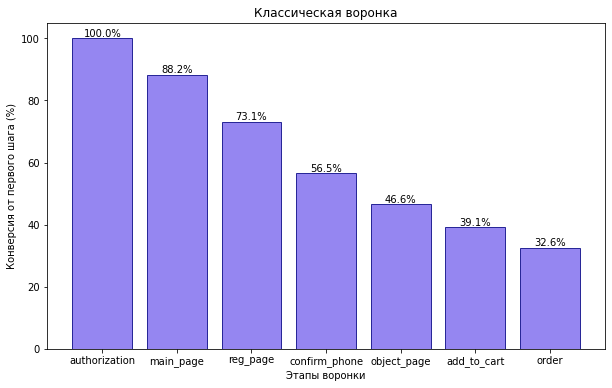

In [14]:
# Визуализируем данные для классической воронки
plt.figure(figsize=(10, 6))
# Строим barplot
bars = plt.bar(funnel_df['step'], 
               funnel_df['conversion_from_first_%'], 
               color='mediumslateblue',
               edgecolor='navy',
               alpha=0.8)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Классическая воронка')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

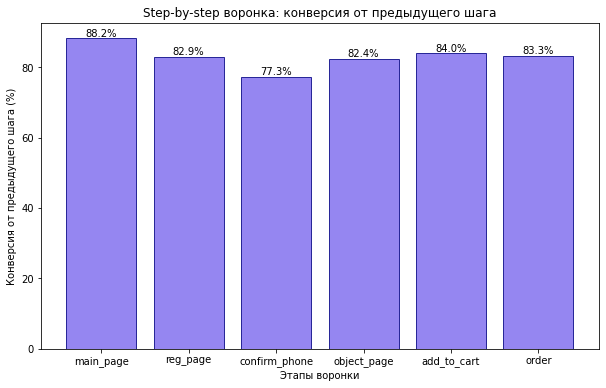

In [15]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot
bars = plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color = 'mediumslateblue', edgecolor='navy',
               alpha=0.8)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

До оформления заказа доходит около трети (32.6%) авторизованных пользователей. Более половины пользователей теряется уже к этапу просмотра страницы блюда. Исходя из воронки step-by-step, больший отток пользователей наблюдается на этапе подтверждения телефона. Это проблемное место пользовательского пути. Необходимо понять, почему так происходит и все ли группы пользователей сталкиваются с этим. 

**Задача 2.2.** Сравните пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постройте и визуализируйте **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравните результаты между собой и проанализируйте, есть ли различия в пользовательском пути для различных приложений. Результаты сравнения опишите в небольшом **промежуточном выводе**.

In [16]:
#Отфильтруем данные на два датафрейма исходя из версий приложения
funnel_df_steps_desktop = funnel_df_steps[funnel_df_steps['device_type'] == 'Desktop']
funnel_df_steps_mobile = funnel_df_steps[funnel_df_steps['device_type'] == 'Mobile']

In [17]:
# Считаем число уникальных пользователей на каждом шаге
funnel_counts_desktop = funnel_df_steps_desktop.groupby('event')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df_desktop = pd.DataFrame({
   'step':funnel_steps,
   'users':funnel_counts_desktop.values
})

# Добавляем конверсии и округляем до 1 знака после запятой
funnel_df_desktop['conversion_from_first_%'] = round(funnel_df_desktop['users'] * 100/ funnel_df_desktop['users'].iloc[0],1)
funnel_df_desktop['conversion_from_previous_%'] = round(funnel_df_desktop['users'] * 100 / funnel_df_desktop['users'].shift(1),1)
print('Конверсия step-by-step для пользователей десктопной версии')
print(funnel_df_desktop)

Конверсия step-by-step для пользователей десктопной версии
            step  users  conversion_from_first_%  conversion_from_previous_%
0  authorization   4750                    100.0                         NaN
1      main_page   4325                     91.1                        91.1
2       reg_page   3432                     72.3                        79.4
3  confirm_phone   3097                     65.2                        90.2
4    object_page   2657                     55.9                        85.8
5    add_to_cart   2203                     46.4                        82.9
6          order   1814                     38.2                        82.3


In [18]:
# Считаем число уникальных пользователей на каждом шаге
funnel_counts_mobile = funnel_df_steps_mobile.groupby('event')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df_mobile = pd.DataFrame({
   'step':funnel_steps,
   'users':funnel_counts_mobile.values
})

# Добавляем конверсии и округляем до 1 знака после запятой
funnel_df_mobile['conversion_from_first_%'] = round(funnel_df_mobile['users'] * 100/ funnel_df_mobile['users'].iloc[0],1)
funnel_df_mobile['conversion_from_previous_%'] = round(funnel_df_mobile['users'] * 100 / funnel_df_mobile['users'].shift(1),1)
print('Конверсия step-by-step для пользователей мобильной версии')
print(funnel_df_mobile)

Конверсия step-by-step для пользователей мобильной версии
            step  users  conversion_from_first_%  conversion_from_previous_%
0  authorization   2810                    100.0                         NaN
1      main_page   2341                     83.3                        83.3
2       reg_page   2069                     73.6                        88.4
3  confirm_phone   1139                     40.5                        55.1
4    object_page    826                     29.4                        72.5
5    add_to_cart    716                     25.5                        86.7
6          order    614                     21.9                        85.8


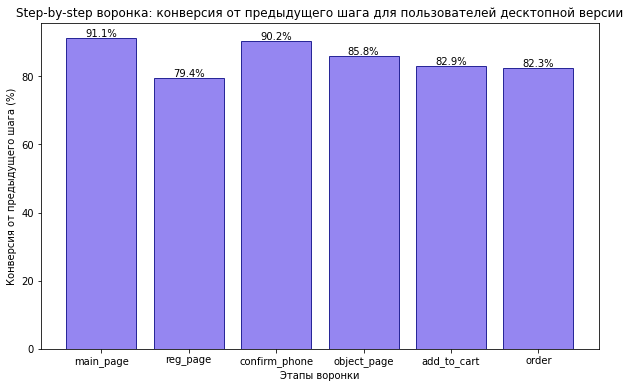

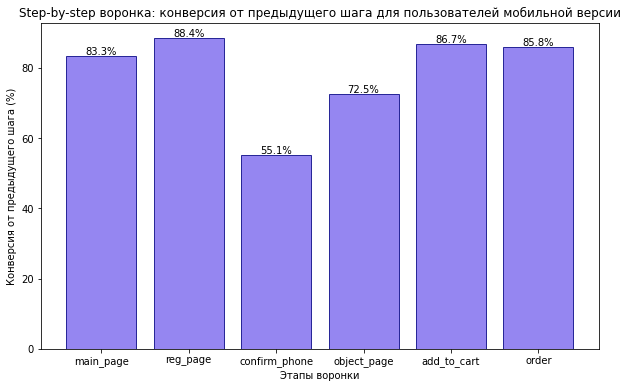

In [19]:
# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot
bars = plt.bar(funnel_df_desktop['step'][1:], funnel_df_desktop['conversion_from_previous_%'][1:], color = 'mediumslateblue', edgecolor='navy',
               alpha=0.8)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=10)
    
plt.title('Step-by-step воронка: конверсия от предыдущего шага для пользователей десктопной версии')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()


# Визуализируем данные, кроме первого шага, чтобы не выводить NaN
plt.figure(figsize=(10, 6))
# Строим barplot
bars = plt.bar(funnel_df_mobile['step'][1:], funnel_df_mobile['conversion_from_previous_%'][1:], color = 'mediumslateblue', edgecolor='navy',
               alpha=0.8)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom',
             fontsize=10)
    
plt.title('Step-by-step воронка: конверсия от предыдущего шага для пользователей мобильной версии')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

### Промежуточный вывод 
Анализ пользовательских путей выявил существенные различия между десктопной и мобильной версиями. Десктопная версия демонстрирует значительно более высокую общую конверсию (38,2% против 21,9% у мобильной), что свидетельствует о более комфортном пользовательском опыте. 

Наиболее проблемным этапом для мобильных пользователей стало подтверждение телефона, где конверсия от предыдущего шага составила лишь 55,1% против 90,2% в десктопной версии, то есть около половины мобильных пользователей теряется именно на этом этапе — это указывает на возможные сложности с UX мобильной формы. 

Основной вывод: мобильная версия требует срочного улучшения процесса подтверждения телефона, так как именно этот этап становится главным барьером для пользователей.

---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установим **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

In [20]:
#Отфильтруем данные по дате и факту заказа для анализа
filtered_data = data[(data['datetime'] <= '2021-07-01') & (data['event'] == 'order')].copy()
#Посмотрим на данные по выручке, чтобы убедиться в отсутсвии аномальных значений
print(filtered_data['revenue'].describe())
print('Количество пустых значений в столбце revenue:')
print(filtered_data['revenue'].isna().sum())

count     3501.000000
mean      2537.469238
std       2225.393555
min        235.199997
25%       1316.000000
50%       1944.599976
75%       3150.000000
max      42000.000000
Name: revenue, dtype: float64
Количество пустых значений в столбце revenue:
0


Выручка не имеет аномальных показателей - например, отрицательных или пустых значений. Минимальное значение - 235.2, среднее значение - 2537.469 - немного превышает медиану данных - 1944.6. Однако это может быть связано с отдельными заказами, приносящими высокую выручку. 

In [21]:
#Выделим количество дней с покупки до даты анализа
filtered_data['order_recency'] = pd.to_datetime('2021-07-01') - filtered_data['datetime']

# Группируем данные для каждого пользователя и рассчитываем данные для RFM-анализа:
data_rfm = filtered_data.groupby('user_id').agg(
    # Количество дней с последнего заказа:    
    recency = ('order_recency', lambda x: x.min().days),
    # Количество заказов за период времени: 
    frequency = ('order_id', 'nunique'),
    # Сумма стоимости всех заказов: 
    monetary_value = ('revenue', 'sum')
).reset_index()

print(data_rfm.head(10))

   user_id  recency  frequency  monetary_value
0   5506.0       30          2     3752.000000
1   6291.0       55          1     1750.000000
2   6820.0       39          1     1260.140015
3  11062.0       55          1     3785.600098
4  13254.0       52          1      553.000000
5  19806.0        8          1     1680.000000
6  22712.0        1          1     1120.000000
7  23683.0       30          1     3472.000000
8  26648.0       19          1     2240.000000
9  28117.0       19          2    11319.755859


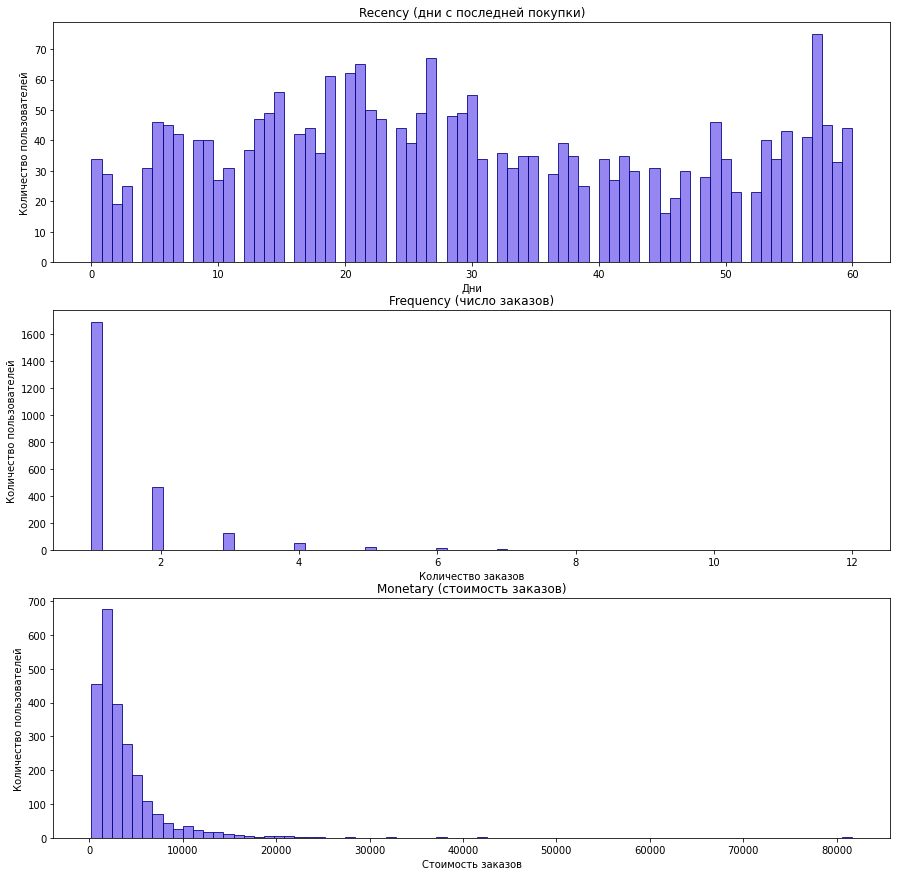

In [22]:
# Строим три гистограммы
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Давность
axes[0].hist(data_rfm['recency'], bins=75, color = 'mediumslateblue', edgecolor='navy', alpha=0.8)
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

# Частота
axes[1].hist(data_rfm['frequency'], bins=75, color = 'mediumslateblue', edgecolor='navy', alpha=0.8)
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

# Сумма всех заказов
axes[2].hist(data_rfm['monetary_value'], bins=75, color = 'mediumslateblue', edgecolor='navy', alpha=0.8)
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()


### Анализ гистограмм
**Recency:** сервис имеет свежую аудиторию, которая совершала покупки в течении 7 дней до даты анализа. Нужно мотивировать этих клиентов совершать повторные заказы. Другая часть клиентов забывает о сервисе, что видно по размеру столбцов после 50 дней. Таким клиентам нужно напомнить о продукте - например, предложить скидку на следующий заказ, отправить email или push-уведомлнение. 

**Frequency:** подавляющая часть пользователей (примерно 1650 клиентов) совершает лишь один заказ. Около 600 клиентов заказывают вновь. Однако можно заметить, что постоянных пользователей, которые регулярно совершают заказы, очень мало, просиходит резкий спад после 2 заказов. Это говорит о том, пользователи немотивированы пользоваться сервисом в долгосрочной перспективе и нужно понять почему. Среди возможных причин, неудовлетворенность обслуживанием, единоразовый заказ по акции и другое. Можно внедрить программу лояльности, бонусы за повторные заказы, чтобы стимулировать клиентов оставаться. 

**Monetary:** пик количества пользователей по стоимости заказов приходится на 2 000 - 3 000, а далее показатели начинают резко снижаться. Это говорит о том, что основу бизнеса составляют мелкие заказы и чтобы увеличивать выручку, необходимо стимулировать повторные заказы. Также можно отметить, что есть клиенты, совершающие покупки на более крупные суммы от 20 000 до 42 000. Их необходимо удерживать, предлагая персонализированные предложения. 


**Общий вывод:** необходимо поработать над стимулированием пользователей совершать повторные заказы и удержанием крупных клиентов.

**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Примените следующие подходы к выделению RFM сегментов:
- **Recency** — разделите на три равные группы.
- **Frequency** —  разделите на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделите на три группы по 33-му и 66-му перцентилям.
    
После этого посчитайте количество покупателей в каждом сегменте, сделайте промежуточные выводы и напишите рекомендации.

In [23]:
# Определяем группу пользователя по количеству дней с момента последнего заказа: 
data_rfm['r'] = pd.cut(data_rfm['recency'], bins=3, labels=[3,2,1])

# Определяем группу пользователя по количеству заказов: 
data_rfm['f'] = pd.cut(data_rfm['frequency'], bins = [0, 1, 2, float('inf')], labels=[1,2,3])

# Определяем группу пользователя по сумме стоимости заказов: 
data_rfm['m'] = pd.qcut(data_rfm['monetary_value'], q = 3, labels=[1,2,3])

# Находим групповой RFM-индекс:
data_rfm[['r','f','m']] = data_rfm[['r','f','m']].astype('str')
data_rfm['rfm_group'] = data_rfm['r'] + data_rfm['f'] + data_rfm['m']

# Выводим первые строки таблицы:
print(data_rfm.head())

   user_id  recency  frequency  monetary_value  r  f  m rfm_group
0   5506.0       30          2     3752.000000  2  2  3       223
1   6291.0       55          1     1750.000000  1  1  1       111
2   6820.0       39          1     1260.140015  2  1  1       211
3  11062.0       55          1     3785.600098  1  1  3       113
4  13254.0       52          1      553.000000  1  1  1       111


In [24]:
# Группируем данные по сегментам и считаем их размер:
rfm_group = data_rfm.groupby('rfm_group').agg({'user_id':'nunique'}).reset_index()

# Считаем долю пользователей в каждом сегменте:
rfm_group['user_share'] = rfm_group['user_id'] / rfm_group['user_id'].sum()

# Выводим результат:
print(rfm_group.sort_values(by='user_id', ascending=False))

   rfm_group  user_id  user_share
17       311      272    0.113903
8        211      260    0.108878
0        111      234    0.097990
18       312      213    0.089196
9        212      211    0.088358
1        112      209    0.087521
19       313      112    0.046901
10       213      108    0.045226
13       223      107    0.044807
22       323      102    0.042714
16       233       93    0.038945
5        123       80    0.033501
24       333       74    0.030988
2        113       72    0.030151
21       322       54    0.022613
12       222       51    0.021357
4        122       44    0.018425
7        133       38    0.015913
3        121       14    0.005863
11       221        9    0.003769
20       321        9    0.003769
6        132        8    0.003350
23       332        7    0.002931
15       232        6    0.002513
14       231        1    0.000419


Распределение пользователей по RFM-сегментам достаточно неравномерное.

Самые большие сегменты по числу пользователей:
- 311 — около 11.4% пользователей (недавние, но с низкой частотой и малыми тратами)
- 211 — около 10.9% пользователей (средняя давность, низкая частота и траты)
- 111 — около 9.8% пользователей (давние, низкая частота и траты) 
- В сегментах 312, 212, 112 от 8.8 до 8.9% пользователей.
- К сегменту 333 относятся 3.1% пользователей. 
- Доли каждых оставшихся сегментов составляют менее 5%. 

Можно заметить, что в основе бизнеса нет клиентов, совершивших более одного заказа. Причем сегменты, занимающие топ-3 позиций по числу клиентов, отличаются лишь давностью покупок. Это значит, что основной задачей для компании сейчас является стимулирование пользователей совершать повторные заказы. Также можно поработать над увеличением среднего чека. 

Рекомендации: вновь привлечь внимание пользователей к продукту и внедрить программу лояльности для стимулирования повторных заказов и роста среднего чека. Удержать пользователей сегмента 333 за счет персонализированных предложений. 



---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделим рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволит выделить группы ресторанов с похожими характеристиками и разработать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовьте данные для кластеризации и для каждого ресторана подсчитайте:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [25]:
data_restaraunt = data[data['event'] == 'order'].groupby('rest_id').agg(
    orders_count = ('order_id', 'nunique'),
    avg_bill = ('revenue', 'mean'),
    object_count = ('object_id', 'nunique')
).reset_index()

print(data_restaraunt.head())

                            rest_id  orders_count     avg_bill  object_count
0  1be5a933aab34fbab594bebba48e976e           144  2260.180176            28
1  1d6bb74687104fa1953924c9684fe624           108  2959.256592            19
2  2c6095730b514c189ee41c65f03febc3             8  1673.000000             4
3  3247a3b5f9494812a3c1a73c5b61f004            33  2777.209717             4
4  39b7eab4f4704ed2886fafe171489960            33  2011.269653             5


**Задача 4.2.** Нормализуйте данные и найдите оптимальное количество кластеров, использовав метод `.inertia_`. Постройте график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

In [26]:
#Округлим средний чек до двух знаков после запятой
data_restaraunt['avg_bill'] = round(data_restaraunt['avg_bill'], 2)

In [27]:
#Используем метод кластеризации
for k in range(2, 15):  # Цикл для перебора разного числа кластеров
   km = KMeans(n_clusters=k)  # Создаём KMeans с текущим числом кластеров
   km.fit_transform(data_restaraunt[['orders_count', 'avg_bill', 'object_count']])  # Применяем кластеризацию к данным
   print("Суммарное внутрикластерное расстояние при", k, "кластерах равно: ",
         km.inertia_)  # Выводим полученное значение

Суммарное внутрикластерное расстояние при 2 кластерах равно:  7193510.849507578
Суммарное внутрикластерное расстояние при 3 кластерах равно:  3926794.3879727838
Суммарное внутрикластерное расстояние при 4 кластерах равно:  1844874.751635584
Суммарное внутрикластерное расстояние при 5 кластерах равно:  843226.2267397887
Суммарное внутрикластерное расстояние при 6 кластерах равно:  505199.5082650011
Суммарное внутрикластерное расстояние при 7 кластерах равно:  328169.8001547158
Суммарное внутрикластерное расстояние при 8 кластерах равно:  246614.4931285381
Суммарное внутрикластерное расстояние при 9 кластерах равно:  191852.87445660928
Суммарное внутрикластерное расстояние при 10 кластерах равно:  158712.70189731813
Суммарное внутрикластерное расстояние при 11 кластерах равно:  131980.73132289448
Суммарное внутрикластерное расстояние при 12 кластерах равно:  91331.86065570265
Суммарное внутрикластерное расстояние при 13 кластерах равно:  61614.33339456469
Суммарное внутрикластерное расст

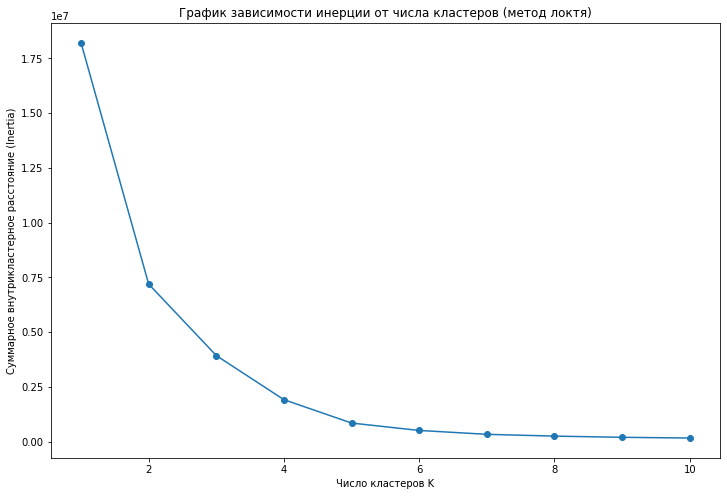

In [28]:
# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров
i = []

# Задаём диапазон количества кластеров
min_k = 1
max_k = 10

plt.figure(figsize=(12, 8))

# Перебираем разное количество кластеров
for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(data_restaraunt[['orders_count', 'avg_bill', 'object_count']])  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров
plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

График показывает, что наибольшие перепады значений происходят с 1 по 4 кластер, после - спад становится более равномерным и плавным. Оптимальное число кластеров в данном случае - 4, так как в таком случае сохраняется баланс между детализацией и интерпретируемостью результатов. 

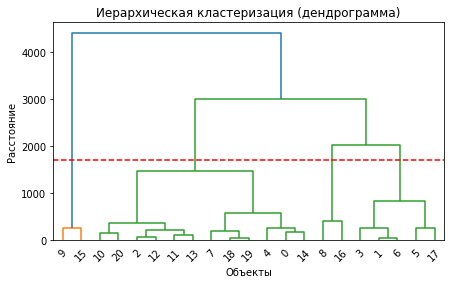

In [29]:
# Код ревьюера:
# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_restaraunt[['orders_count', 'avg_bill', 'object_count']], method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')

plt.axhline(y=1700, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

**Задача 4.3.** Проведите кластеризацию, проанализируйте полученные результаты и рассчитайте средние значения по каждому кластеру.
    
После этого визуализируйте результаты, чтобы проследить зависимость признаков друг от друга. Постройте две визуализации, на которые нанесите все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишите каждый кластер в промежуточном выводе. 

In [30]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_restaraunt[['orders_count', 'avg_bill', 'object_count']])

# Добавляем метки кластеров в исходные данные
data_restaraunt['cluster'] = clusters

data_restaraunt.groupby('cluster')['rest_id'].nunique().reset_index()

,cluster,rest_id
0,0,6
1,1,2
2,2,11
3,3,2


Мы получили четыре кластера, размеры которых составляют 6, 2, 11 и 2 соотвественно. Рассмотрим их средние показатели.

In [31]:
# Сортируем кластеры по возрастанию «Количества заказов»
sorted_indices = np.argsort(kmeans.cluster_centers_[:, 0])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

# Создаём DataFrame из центроидов
centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Количество заказов', 'Средний чек', 'Количество блюд'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода (2 знака после точки)
pd.options.display.float_format = '{:.3f}'.format

# Выводим таблицу
print(centroids_df.head())

           Количество заказов  Средний чек  Количество блюд
Кластер 1              65.333     3024.752            9.167
Кластер 2              71.727     1931.617            8.636
Кластер 3              84.000     4657.770            2.500
Кластер 4            1100.000     2498.830           83.000


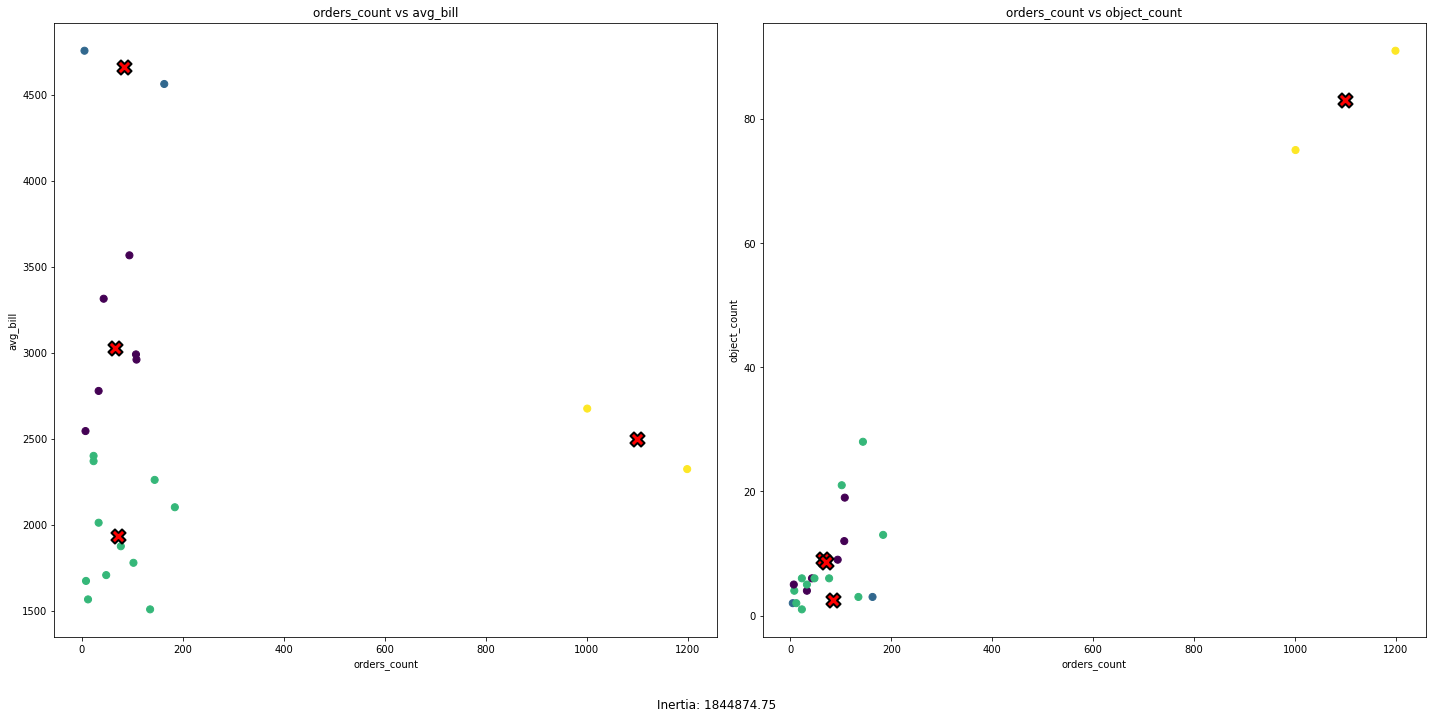

In [32]:
labels = kmeans.fit_predict(data_restaraunt[['orders_count', 'avg_bill', 'object_count']])

# Получаем координаты центров (центроидов) кластеров
centroids = kmeans.cluster_centers_
# Создаём 3 графика (1 строка × 2 столбца) для отображения попарных комбинаций признаков
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Список названий признаков, которые будут использоваться на графиках
axs = ['orders_count', 'avg_bill', 'object_count']

# Перебираем пары признаков
for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2]]):
    x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Строим точки — объекты из датафрейма, раскрашенные по меткам кластера
    axes[i].scatter(
       data_restaraunt[x_label],  # Значения по оси X
       data_restaraunt[y_label],  # Значения по оси Y
       c=labels,  # Цвет зависит от номера кластера
       cmap='viridis',  # Цветовая карта
       s=50  # Размер точек
   )

   # Строим центроиды кластеров красными крестами
    axes[i].scatter(
       centroids[:, x_idx],  # X-координаты центров
       centroids[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X'  # Форма маркера — крест
   )

   # Подписи осей и заголовок графика
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].set_title(f'{x_label} vs {y_label}')

# Подгоняем макет, оставляя место снизу для подписи с инерцией
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций
plt.show()

### Промежуточные выводы 
**Кластер 1:** рестораны с наименьшим числом заказов и средним чеком 3024 р. Они отличаются широким ассортиментов представленных блюд. Их бизнес-модель ориентирована на стабильный, но не выдающийся трафик клиентов, сбалансированный по объему заказов и среднему чеку.

**Кластер 2:** демонстрирует схожие с первым кластером показатели по количеству заказов (72 в среднем) и ассортименту (9 блюд), но при этом его средний чек значительно ниже (1932 рубля). Это рестораны среднего ценового сегмента, возможно, кафе или бистро. Их показатели отражают баланс между доступностью и качеством, что делает их популярными среди широкой аудитории, но не позволяет выйти на более высокие финансовые показатели.

**Кластер 3:** при относительно высоком количестве заказов (84) и рекордном среднем чеке (4658 рублей) эти заведения предлагают минимальный ассортимент - всего 2-3 блюда. Такая модель характерна для эксклюзивных гастрономических проектов, возможно, ресторанов с дегустационными меню, суши-баров премиум-класса или заведений, специализирующихся на дорогих напитках, где основной доход формируется за счет высоких ценников. 

**Кластер 4:** резко выделяется на фоне остальных высокими показателями. Получая 1100 заказов, эти заведения поддерживают средний чек на уровне 2498 рублей при ассортименте в 83 блюда. Бизнес-модель построена на эффекте масштаба: большой поток клиентов компенсирует относительно невысокий средний чек, а обширное меню позволяет удовлетворить потребности разнообразной аудитории.

---

## 5. Итоговый вывод и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт.

Выводы должны быть краткими и ёмкими, ведь их будут читать ваш заказчик, продуктовый менеджер и продуктовая команда.

Анализ данных выявил ключевые точки роста для бизнеса: мобильная версия приложения требует срочной доработки процесса подтверждения телефона, где теряется 79.1% пользователей, в то время как десктопная версия показывает более высокую конверсию. 

Распределение клиентов по RFM-сегментам показывает значительный перекос в сторону разовых покупок — три крупнейших сегмента (311, 211 и 111), составляющие вместе 32% пользователей, объединяют клиентов с низкой частотой заказов и скромными тратами, различающихся только давностью последнего визита. Внимание вызывает отсутствие сформированной базы постоянных клиентов: лишь 3% пользователей относятся к премиальному сегменту 333 (частые покупки + высокие чеки). Три и более заказов имеют менее 10% пользователей. Так, основная проблема бизнеса - низкая лояльность клиентов: большая часть пользователей совершают лишь один заказ, при этом выручку формируют в основном мелкие заказы (2000-3000 руб.).

Анализ партнерских ресторанов выявил четыре ключевых кластера, требующих индивидуального подхода в сотрудничестве с сервисом доставки. Рестораны с высоким средним чеком (3024 рубля) и сбалансированным трафиком нуждаются в подчеркивании их эксклюзивности — для них стоит предусмотреть выделенную категорию в приложении. Рестораны среднего сегмента со стабильным трафиком, но относительно низкой маржинальностью (средний чек 1932 рубля) выиграют от внедрения пакетных предложений и поддержки по популярным позициям. Особого внимания заслуживают рестораны с минимальным ассортиментом, но рекордными чеками (4658 рублей) — для них эффективно создание специального раздела. Крупные сетевые игроки с большим количеством заказов (1100+) и широким ассортиментом требуют приоритетного размещения в поиске и совместных промоакций.

Для роста бизнеса критически важно:
- решить проблему с подтверждением номера телефона для пользователей мобильной версии 
- внедрить многоуровневую систему лояльности
- разработать персонализированные предложения для премиальных клиентов
- стимулировать повторные заказы через таргетированные промоакции
- разработать разные стратегии работы с кластерами ресторанов-партнеров. 